## 3.4 영화 리뷰 분류: 이진 분류 예제

이 데이터셋은 자주 사용하는 10000개의 단어를 딕셔너리 형태로 가져옴.
영화 리뷰 결과(labels)들이 0 혹은 1을 나타내는 긍정과 부정으로 구분되어 있음.


In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


아래의 코드는 원핫 인코딩을 통해, data 셋의 벡터 크기를 일정하게 맞춰줌

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

아래의 코드는 모델을 만드는 과정임 relu 함수는, 음수를 없애는 선형 직선 모형임
train 데이터의 현재 크기는 (25000, 10000)이고 이것이 input으로 사용됨
sigmoid는, 0~1사이의 숫자로 반환을 해주는데, 이 문제는 참 거짓을 따지는 문제이므로 사용할 수 있음
1, 2층의 은닉 유닛은 16인데, 특성을 16개를 뽑아냄
만약 은닉 유닛이 너무 적으면, 특성을 제대로 뽑지 못하므로 안됨
만약 은닉 유닛이 많으면, 불필요하게 특성이 많아지므로 이것도 안됨

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                 metrics=['accuracy'])

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

partial_x_train (15000)으로 훈련하고, 나머지 10000개는 훈련 중에 테스트 용으로 쓰임
epoch는 훈련하는 루프 사이클 횟수를 말하고, batch_size는 잘 모르겠음..
validation_data로 손실과 정확도를 뽑아낼 수 있음

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.5040 - acc: 0.7890 - val_loss: 0.3774 - val_acc: 0.8707
Epoch 2/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.2990 - acc: 0.9045 - val_loss: 0.3003 - val_acc: 0.8905
Epoch 3/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.2173 - acc: 0.9284 - val_loss: 0.3078 - val_acc: 0.8722
Epoch 4/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.1748 - acc: 0.9436 - val_loss: 0.2823 - val_acc: 0.8849
Epoch 5/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.1421 - acc: 0.9543 - val_loss: 0.2857 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.1148 - acc: 0.9650 - val_loss: 0.3150 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 3s 212us/step - 

아래의 그림을 보면, 훈련시킨 데이터로는 loss가 줄어들지만, 훈련 데이터와 관계 없는 validation 데이터로는 loss가 늘어남. 때문에 잘못 설계함을 알 수 있음. 에포크가 커서 문제가 생긴 것 같음

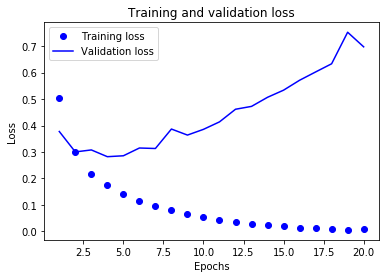

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

정확도 부분에 있어도 위와 같다.

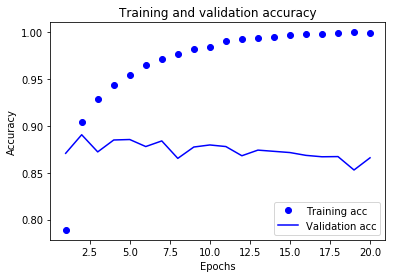

In [8]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

epochs를 4로 줄여 다시 훈련을 해보았음

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/4
25000/25000 [==============================] - 9s 348us/step - loss: 0.4484 - acc: 0.8176
Epoch 2/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.2547 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 140us/step - loss: 0.1967 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 9s 342us/step


In [10]:
results

[0.2951338653182983, 0.88352]

In [9]:
model.predict(x_test)

array([[0.22739214],
       [0.9997132 ],
       [0.82621163],
       ...,
       [0.19360486],
       [0.06373587],
       [0.580737  ]], dtype=float32)